## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# to ignore the warnings 
import warnings 
warnings.filterwarnings("ignore")

## Loading the Dataset

In [3]:
# Accessing top 5 Columns with head method 
df= pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# atrribute to access total numbers of roes and columns
df.shape

(5110, 12)

In [5]:
# atrribute to access all the column names
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# Method Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Method Display descriptive statistics about the DataFrame
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Count the number of missing values in each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Fill missing values in the 'bmi' column with the mean value of that column
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#plot graph for individual columns

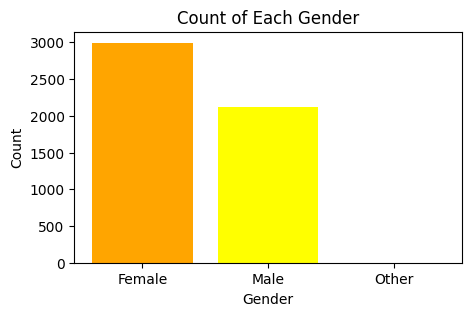

In [12]:
# Access the 'gender' column of the DataFrame df and use the value_counts() method
plt.figure(figsize=(5,3))
gender_counts = df['gender'].value_counts()
colors = ['orange', 'yellow', 'blue']

# Create the bar plot
plt.bar(gender_counts.index, gender_counts, color = colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Each Gender')
plt.show()

In [13]:
print(gender_counts.index)

Index(['Female', 'Male', 'Other'], dtype='object', name='gender')


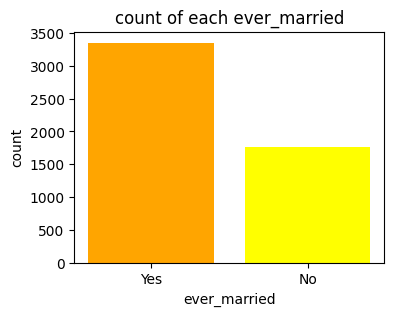

In [14]:
# Access the 'ever_married' column of the DataFrame df and use the value_counts() method
plt.figure(figsize=(4,3))
ever_married_count = df['ever_married'].value_counts()
colors = ['orange', 'yellow']

plt.bar(ever_married_count.index, ever_married_count, color = colors)
plt.xlabel('ever_married')
plt.ylabel('count')
plt.title("count of each ever_married")
plt.show()

In [15]:
print(ever_married_count.index)

Index(['Yes', 'No'], dtype='object', name='ever_married')


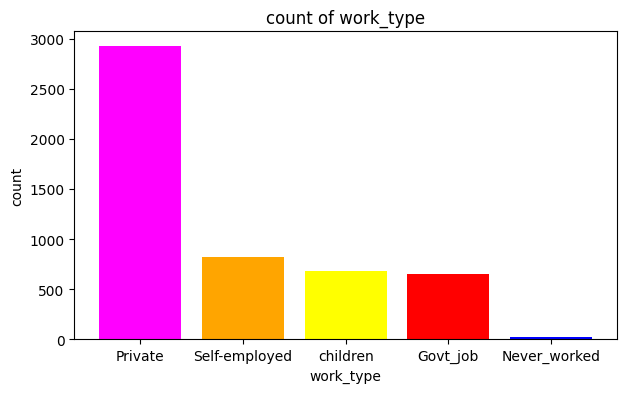

In [16]:
# Access the 'work_type' column of the DataFrame df and use the value_counts() method
plt.figure(figsize=(7,4))
work_type_count = df['work_type'].value_counts()
colors = ['magenta', 'orange', 'yellow', 'red', 'blue']

plt.bar(work_type_count.index, work_type_count, color = colors)
plt.xlabel('work_type')
plt.ylabel('count')
plt.title('count of work_type')
plt.show()

In [17]:
print(work_type_count.index)

Index(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], dtype='object', name='work_type')


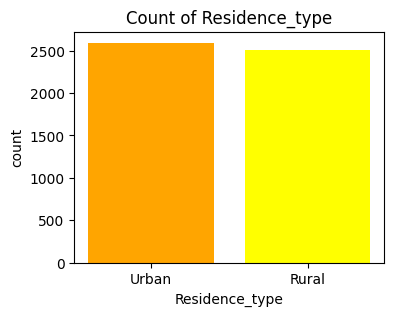

In [18]:
# Access the 'Residence_type' column of the DataFrame df and use the value_counts() method
plt.figure(figsize = (4,3))
Residence_type_count = df['Residence_type'].value_counts()
colors = ['orange', 'yellow']

plt.bar(Residence_type_count.index, Residence_type_count, color = colors)
plt.xlabel('Residence_type')
plt.ylabel('count')
plt.title('Count of Residence_type')
plt.show()

In [19]:
print(Residence_type_count.index)

Index(['Urban', 'Rural'], dtype='object', name='Residence_type')


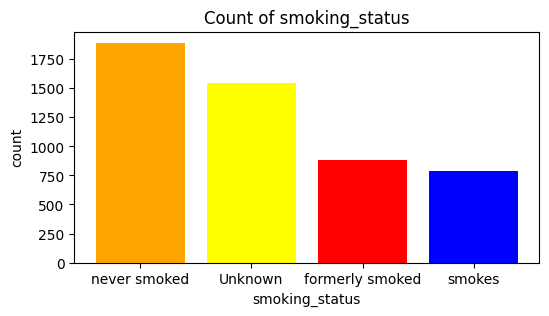

In [20]:
# Access the 'smoking_status' column of the DataFrame df and use the value_counts() method
plt.figure(figsize = (6,3))
smoking_status_count = df['smoking_status'].value_counts()
colors = ['orange', 'yellow', 'red', 'blue']

plt.bar(smoking_status_count.index,smoking_status_count, color = colors)
plt.xlabel('smoking_status')
plt.ylabel('count')
plt.title('Count of smoking_status')
plt.show()

In [21]:
print(smoking_status_count.index)

Index(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype='object', name='smoking_status')


## Create an instance of LabelEncoder

In [22]:
le =LabelEncoder()

In [23]:
# Encoding the all Categorical Data Column to Numerical Data Column
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [25]:
# droping the column labeled 'id' from the DataFrame
# The axis=1 parameter specifies that we want to drop a column
data = df.drop(['id'], axis=1)

In [26]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## Data Preparation

In [27]:
# Drops the 'stroke' column from the DataFrame data
# Adding X and y variable to dataframe and "stroke" Series
X=data.drop('stroke', axis='columns')
y=data.stroke

##### 1 --> "stroke is possible" 

##### 0 --> "Healthy"

##  Splitting the Dataset

In [28]:
# train_test_split functions splitting data into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

## Model Creation

In [29]:
# model variable is assigned to LogisticRegression Algoritham
model= LogisticRegression()

## Model Training

In [30]:
# fit method to train the model
print(model.fit(X_train.values, y_train))

LogisticRegression()


In [31]:
# checking the score of the model
print(model.score(X_test, y_test))

0.9393346379647749


## Model Prediction

In [32]:
# predicting First column from the dataset
model.predict([[1.00,67.00,0.00,1.00,1.00,2.00,1.00,228.69,36.00,1.00]])

array([0], dtype=int64)

In [33]:
#predicting the test data 
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Conclusion:

#### The project aimed to predict the likelihood of heart stroke using a machine learning model trained on healthcare data. After preprocessing the dataset, including handling missing values and encoding categorical variables, a LogisticRegression was trained. The model achieved an impressive accuracy score of 0.939 on the testing dataset, indicating its effectiveness in predicting stroke outcomes based on features such as age, gender, BMI, marital status, work type, residence type, and smoking status. The high accuracy suggests that the model could be valuable in assisting healthcare professionals in identifying individuals at risk of heart stroke, allowing for early intervention and prevention strategies.